In [1]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('HASU Historical Data(2).csv')
data['Time'] = range(len(data))  # Create time index starting from t = 0

data.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Time
0,6/20/2022,32.2,NaN,NaN,NaN,NaN,NaN,0
1,6/21/2022,33.0,NaN,NaN,NaN,NaN,NaN,1
2,6/22/2022,33.0,NaN,NaN,NaN,NaN,NaN,2
3,6/23/2022,33.0,NaN,NaN,NaN,NaN,NaN,3
4,6/24/2022,35.0,NaN,NaN,NaN,NaN,NaN,4


In [2]:
data['Time'] = range(len(data))  # Create time index starting from t = 0
data.head()


,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Time
0,6/20/2022,32.2,NaN,NaN,NaN,NaN,NaN,0
1,6/21/2022,33.0,NaN,NaN,NaN,NaN,NaN,1
2,6/22/2022,33.0,NaN,NaN,NaN,NaN,NaN,2
3,6/23/2022,33.0,NaN,NaN,NaN,NaN,NaN,3
4,6/24/2022,35.0,NaN,NaN,NaN,NaN,NaN,4


In [3]:
# Calculate log returns
data['LogReturn'] = np.log(data['Price'] / data['Price'].shift(1))
data.head()


,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Time,LogReturn
0,6/20/2022,32.2,NaN,NaN,NaN,NaN,NaN,0,NaN
1,6/21/2022,33.0,NaN,NaN,NaN,NaN,NaN,1,0.024541
2,6/22/2022,33.0,NaN,NaN,NaN,NaN,NaN,2,0.000000
3,6/23/2022,33.0,NaN,NaN,NaN,NaN,NaN,3,0.000000
4,6/24/2022,35.0,NaN,NaN,NaN,NaN,NaN,4,0.058841


In [4]:
# Estimate drift (µGB) and scale (σ) parameters
mu_gb = data['LogReturn'].mean()
sigma = data['LogReturn'].std()

print(f'Drift (µGB): {mu_gb}')
print(f'Scale (σ): {sigma}')


Drift (µGB): 0.0011909837066137467
Scale (σ): 0.023382021704588293


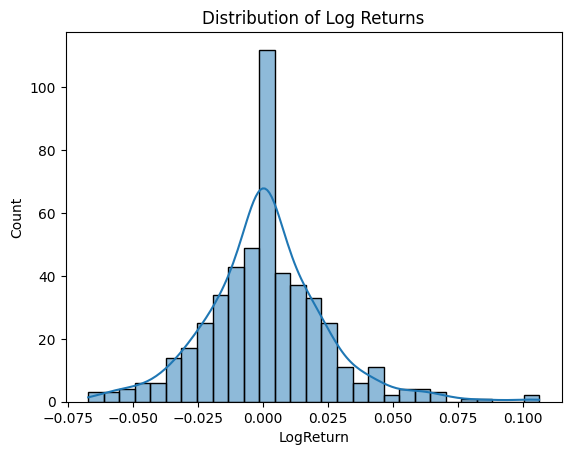

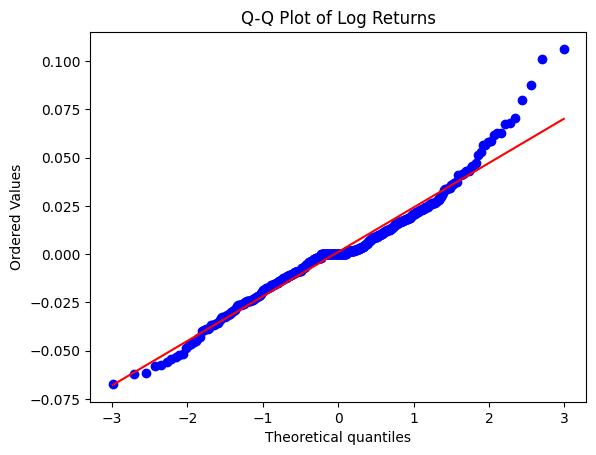

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot log returns to check normality
sns.histplot(data['LogReturn'].dropna(), kde=True)
plt.title('Distribution of Log Returns')
plt.show()

# Q-Q plot
import scipy.stats as stats
stats.probplot(data['LogReturn'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Log Returns')
plt.show()


The histogram looks approximately bell-shaped and the point in the Q-Q plot lieclose to the straight line. So we suggest the log-returns are approximately normally distributed. You can determine whether the GBM model is appropriate for the HASU stock price data.

In [6]:
# Simulate 5000 sample paths for the next 20 days
num_simulations = 5000 # number of cases
num_days = 20
last_price = data['Price'].iloc[-1] # Most recent price of asset

# Simulate sample paths
simulation_df = pd.DataFrame()

for x in range(num_simulations):
    prices = [last_price]
    for t in range(num_days):
        shock = np.random.normal(loc=mu_gb, scale=sigma)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    simulation_df[x] = prices

simulation_df


<ipython-input-6-a0c47fe0e222>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = prices


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,...,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000
1,58.042953,59.404532,60.147484,56.766839,59.463074,59.894066,56.937838,58.765548,55.694485,57.679868,...,56.159875,58.470998,58.180126,56.472072,58.349127,58.067038,57.142642,58.191248,56.805124,57.719086
2,56.839993,62.263047,59.329354,57.959901,59.808505,60.993794,57.490856,56.819459,55.436474,56.971918,...,56.753652,57.138834,58.625253,55.877785,58.419704,58.447014,59.260531,59.532442,55.401209,58.279863
3,56.048807,63.475435,59.299947,60.582314,61.655204,59.454281,57.132734,58.612640,55.389436,56.476174,...,55.576039,58.178557,60.589799,55.567552,58.714071,58.034794,57.466310,62.652701,56.912941,58.689941
4,55.899197,64.180427,58.340091,59.837175,62.600706,58.608637,56.284791,58.573917,54.562863,58.051243,...,56.205629,60.427051,60.573666,53.661940,58.658594,59.494857,58.066648,64.112159,57.537935,57.901240
5,55.104322,63.358814,58.754522,60.043336,62.932134,57.231294,57.821392,58.015193,53.979875,59.455028,...,53.384945,62.677446,60.362035,56.191396,59.941794,61.053434,60.655512,62.876957,61.030741,57.375641
6,56.749343,64.177936,59.125042,60.279941,60.196427,58.207815,53.036051,54.878794,54.368466,59.833245,...,52.540766,62.352058,60.230648,56.887384,58.579166,63.293065,62.630738,63.031259,61.028326,57.587678
7,53.985066,67.497803,60.794307,60.059779,60.699753,56.205656,50.934567,56.716674,56.541246,58.943988,...,50.818392,60.788967,60.495889,56.521997,58.492930,63.000207,63.359034,62.434569,60.559252,59.156086
8,51.790714,65.253791,59.913556,60.210877,60.569158,56.616933,49.168746,57.127622,55.168212,58.821802,...,50.774071,61.045716,58.424173,55.953625,59.229528,64.758225,63.842179,61.956430,62.106880,61.643510
9,51.820185,65.581005,59.992776,59.385344,59.291575,55.574118,49.896323,54.308948,53.885026,60.005620,...,53.429629,62.669827,58.963974,57.254011,58.899180,62.815424,63.546637,65.153393,64.698133,60.274861


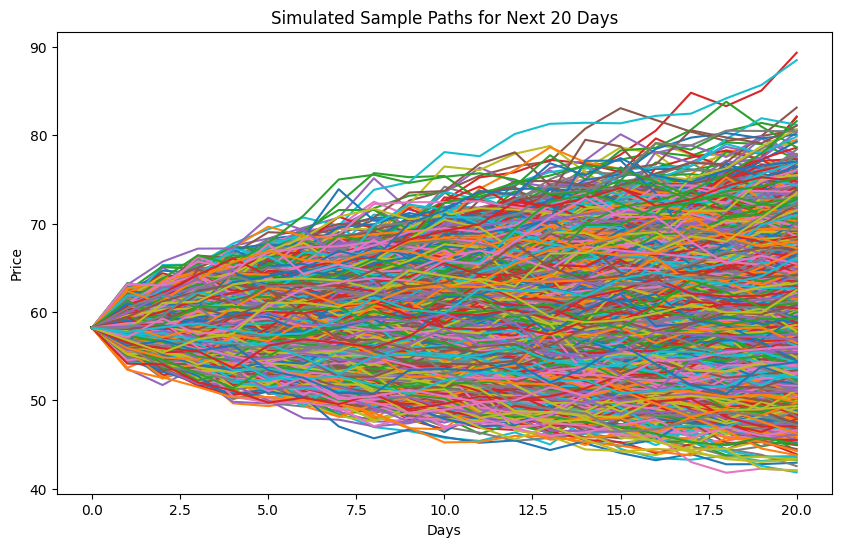

In [7]:
# Plot sample paths
plt.figure(figsize=(10, 6))
plt.plot(simulation_df)
plt.title('Simulated Sample Paths for Next 20 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


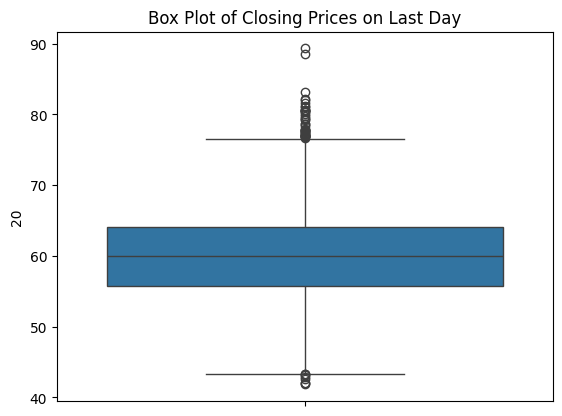

In [8]:
# Box plot for the last day prices
last_day_prices = simulation_df.iloc[-1, :]
sns.boxplot(last_day_prices)
plt.title('Box Plot of Closing Prices on Last Day')
plt.show()


In [9]:
# Calculate probability of closing price between 55 and 60
prob_55_60 = ((last_day_prices >= 55) & (last_day_prices <= 60)).mean()
print(f'Probability of closing price between 55 and 60: {prob_55_60}')


Probability of closing price between 55 and 60: 0.2924


In [10]:
# Calculate the 95% prediction interval
prediction_interval = np.percentile(last_day_prices, [2.5, 97.5])
print(f'95% Prediction Interval: {prediction_interval}')


95% Prediction Interval: [48.67435799 73.17519692]
